In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
#df = pd.read_csv('laptop_data.csv')
df = pd.read_csv('/content/laptop_data.csv')

In [6]:
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.shape


(1303, 12)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


**Checking for Duplicates**

In [9]:
df.duplicated().sum()

0

`This cell checks for duplicate rows in the dataset. The result (0) shows that there are no duplicate entries, ensuring the uniqueness of the data points.`

**Dropping Unnecessary Columns**

In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


`The column Unnamed: 0, which likely contains an unnecessary index, is dropped. After that, the first few rows of the updated DataFrame are displayed.`

**Data Cleaning and Type Conversion**

In [12]:

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [13]:

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')


`Cleans the Ram and Weight columns by removing the units ('GB' and 'kg'). Then, it converts the Ram column to integer and the Weight column to float. This prepares the data for further numerical analysis.`

**Updated Data Information**

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


`confirms that after cleaning, the data types of Ram and Weight have been successfully converted to integers and floats, respectively, ensuring consistency for future operations.`

**Price Distribution Visualization**

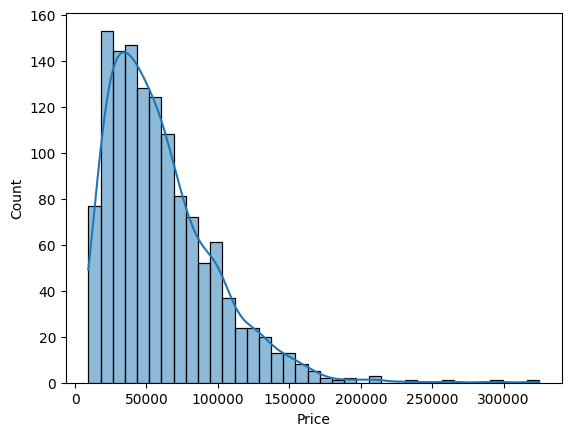

In [15]:
sns.histplot(df['Price'],kde=True)
plt.show()

`The graph visually represents the distribution of prices in the dataset, showing skewness, outliers, modality, central tendency, and spread. This information helps in understanding pricing patterns`

**Company Bar Plot**

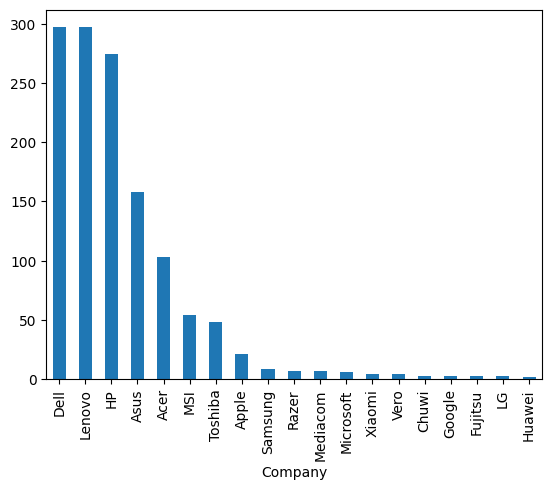

In [16]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

` creates a bar plot displaying the count of laptops from each company in the dataset.`

**Company vs. Price Bar Plot**

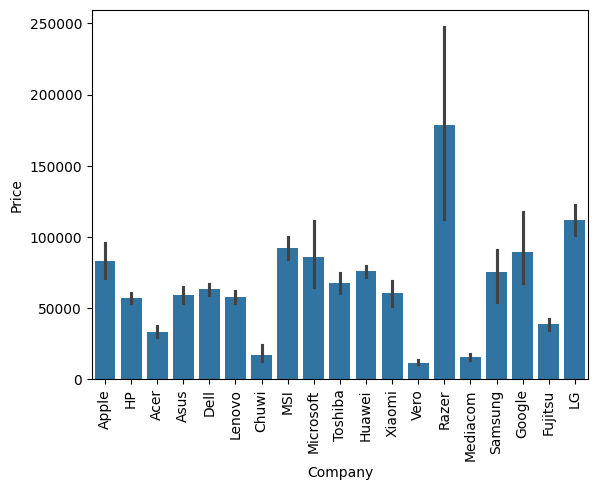

In [17]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

` create a bar plot showing the average price of laptops for each company`

**TypeName Bar Plot**

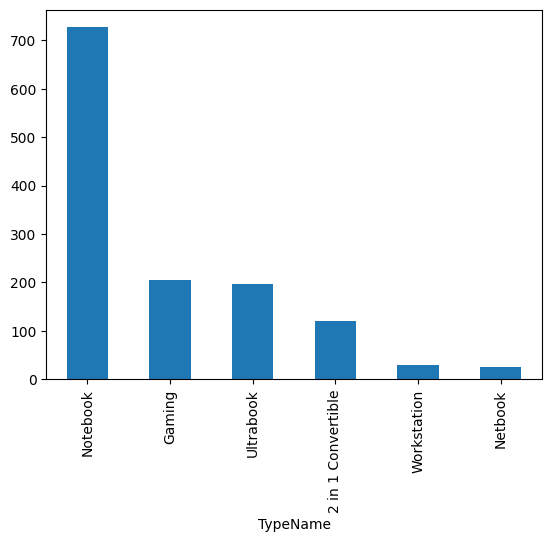

In [18]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

`This creates a bar plot showing the count of laptops by type (e.g., Notebook, Ultrabook)`

**TypeName vs. Price Bar Plot**

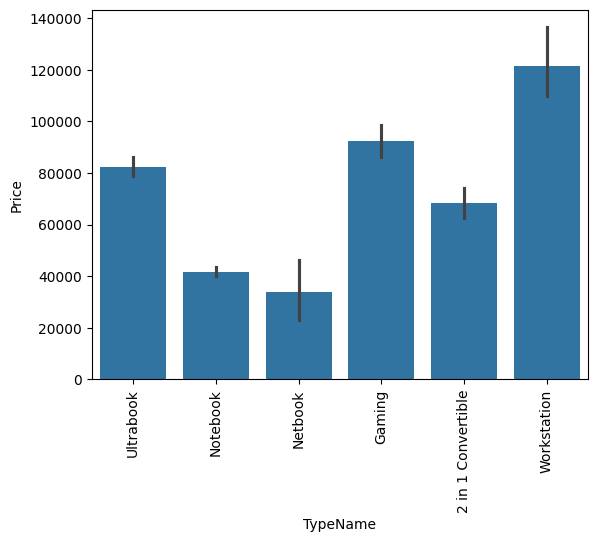

In [19]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

`bar plot that shows the average price of laptops by type`

**Inches vs. Price Scatter Plot**

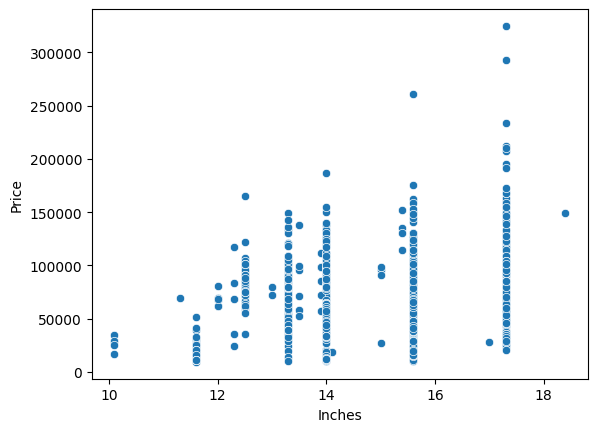

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.show()

`The scatter plot shows the relationship between "Inches" and "Price". There seems to be a general trend of increasing price with increasing inches, but the relationship is not perfectly linear`

**Screen Resolution Value Counts**

In [21]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


`returns the counts of each screen resolution type in the dataset`

**Touchscreen Feature Creation**

In [22]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

`A new column Touchscreen is created that indicates whether the laptop has a touchscreen (1) or not (0).`

In [23]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
375,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,1.91,26053.3872,0
998,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,95850.7200,0
1084,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,39960.0000,0
184,Xiaomi,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.95,63882.7200,0
146,HP,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,107305.9200,1


`This displays a random sample of 5 rows from the DataFrame, showing various laptop specifications and the newly created Touchscreen column.`

**Plotting Touchscreen vs. Price**
 - This is used to see if having a touchscreen impacts the price of laptops.

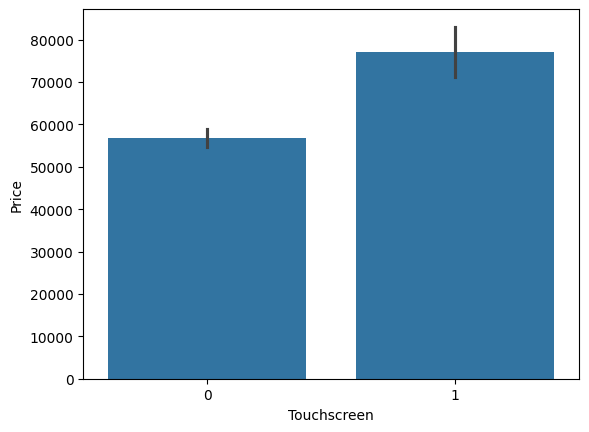

In [24]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.show()

`bar plot to visualize the relationship between the Touchscreen feature and the Price of the laptops. The Touchscreen column has binary values (0 for non-touchscreen and 1 for touchscreen), and the plot helps to compare the average prices for these two categories.`

**Creating the Ips Column**
 - Helps categorize laptops based on whether they use IPS technology, which could potentially impact display quality and price.

In [25]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

`This cell creates a new column Ips in the DataFrame. It uses the ScreenResolution column to check if the screen has an "IPS" panel (a common type of display technology) and assigns 1 if true and 0 otherwise`

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


`head() function displays the first five rows of the DataFrame to show the newly added column.`

**Plotting Ips Value Counts**
 - is gives a quick insight into how many laptops in the dataset have an IPS panel, aiding further analysis.

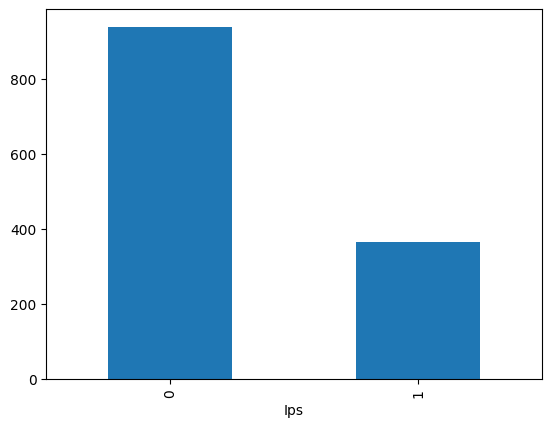

In [27]:
df['Ips'].value_counts().plot(kind='bar')
plt.show()

` bar plot of the value counts for the Ips column. It shows the distribution of laptops that have an IPS display (1) versus those that don't (0).`

**Plotting Ips vs. Price**
 - check whether having an IPS display significantly influences the price of the laptops.


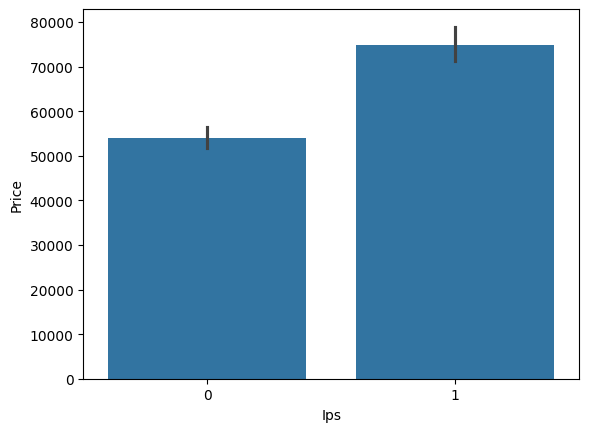

In [28]:
sns.barplot(x=df['Ips'],y=df['Price'])
plt.show()

`This bar plot visualizes the relationship between the Ips feature and the Price of the laptops. It helps compare the average prices of laptops with IPS screens (1) and without IPS screens (0).`

In [29]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0


**Splitting ScreenResolution**
 - separating resolution into two numeric columns, we can later analyze the relationship between screen resolution and other features, such as price or screen size.



In [30]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True) # splits "ScreenResolution" into two parts using "x" and stores them in new columns.

In [31]:

df['X_res'] = new[0]
df['Y_res'] = new[1]

In [32]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080


**Cleaning the X_res Column**
 - Cleaned up by removing commas and extracting only numeric values, ensuring it can be used for numerical analysis such as regression or correlation with Price.



In [33]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

 - ` performs data cleaning on the X_res column, which contains the horizontal screen resolution values. It performs two key steps:`
    
 -  ` Remove commas: The .str.replace(',', '') method removes any commas in the X_res column values. `
    
  -  `Extract numeric values: The .str.findall(r'(\d+\.?\d+)') method uses a regular expression to find any numbers in the X_res strings.`
    
  -  `Apply lambda function: The .apply(lambda x: x[0]) selects the first (and usually only) numeric value from the list created by findall.`
    


In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


**Converting X_res and Y_res to Integer Type**

In [35]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

`the X_res and Y_res columns, which represent the horizontal and vertical screen resolutions, are being converted from object/string data types to integers using astype('int'). This is necessary for numerical operations like calculating pixel density (PPI), correlations, and other computations.`



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


**Numeric Columns and Calculating Correlation with Price**

In [37]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation of numeric columns
correlation = numeric_df.corr()['Price']
print(correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


 -  ` computes the correlation of each numeric column with the target column Price. The corr() method is used to find the Pearson correlation coefficients, which measure the linear relationship between the variables.`

 -  ` Ram has the strongest correlation with Price, indicating that higher RAM usually means higher price.`
 -  ` Screen resolution (X_res, Y_res) also shows a moderate positive correlation with price, suggesting that laptops with higher resolution screens tend to be more expensive.`
 - `  Other features like weight, touchscreen capability, and IPS displays show weaker correlations with price.`

**Adding ppi (Pixel Per Inch) and Recomputing Correlations**
 - A higher PPI means a sharper and more detailed display, which can be an important factor in determining a laptop's price.


In [38]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')


`creates a new column called ppi (Pixel Per Inch), which measures screen pixel density. PPI is calculated as the square root of the sum of squares of X_res and Y_res, divided by the screen size in inches.`



**Recomputing Correlation after Adding ppi**
 - After adding the ppi column, this cell recomputes the correlations of numeric columns with Price

In [39]:
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation of numeric columns
correlation = numeric_df.corr()['Price']
print(correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [40]:
fig = px.bar(x=correlation.index, y=correlation.values,
             title="Correlation with Price")
fig.show()

`ppi column has a moderate correlation of 0.473487 with Price, indicating that higher PPI is somewhat correlated with higher laptop prices.`

**Dropping ScreenResolution column**
 - Removed the ScreenResolution column to avoid redundancy and reduce unnecessary data.


In [41]:
df.drop(columns=['ScreenResolution'],inplace=True)

`The ScreenResolution column has been broken down into two separate columns: X_res and Y_res. Since this detailed information is now captured in other columns, the original ScreenResolution column becomes redundant and is dropped.`


In [42]:
df.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


**Dropping 'Inches', 'X_res', and 'Y_res' Columns**
 -  Removing features that are no longer useful
 - Dropped Inches, X_res, and Y_res to simplify the dataset and retain only the most relevant features

In [43]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

`After calculating the ppi (pixels per inch), the individual columns for Inches, X_res, and Y_res are no longer needed for further analysis, as the necessary information is already captured in the ppi column.`


In [44]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


**Understanding CPU Distribution**
 - identify the most common CPU types and how frequently they appear in the dataset.


In [45]:
df['Cpu'].value_counts()


,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


**Extracting CPU Name**
 - Simplifies the CPU details by retaining only the relevant name information (e.g., Intel Core i5) for further analysis.


In [46]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

`extracts the first three words from the Cpu column (which typically represent the brand, series, and model) and creates a new column Cpu Name.`

In [47]:
"""This Python function `fetch_processor(text)` takes a text input as a parameter and checks if the text matches specific Intel processor names
('Intel Core i7', 'Intel Core i5', 'Intel Core i3'). If it matches, it returns the input text. If the text starts with 'Intel' but is not one of the specific Intel processor names,
it returns 'Other Intel Processor'.If the text does not match any of the Intel processor names or start with 'Intel', it returns 'AMD Processor'."""
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

`This function categorizes CPUs into four broad categories: Intel Core i7, Intel Core i5, Intel Core i3, Other Intel Processor, and AMD Processor.
`

In [48]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

``This line of code is creating a new column  'Cpu brand'. It is populating this new column by applying the function `fetch_processor` to each value in the 'Cpu Name' column of the DataFrame. The result of the function call for each value in the 'Cpu Name' column is stored in the corresponding row of the 'Cpu brand' column.``


In [49]:
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


**Plotting CPU Brand Distribution**
- Plots a bar chart of the count of laptops by Cpu brand to visualize the distribution of CPU brands in the dataset.


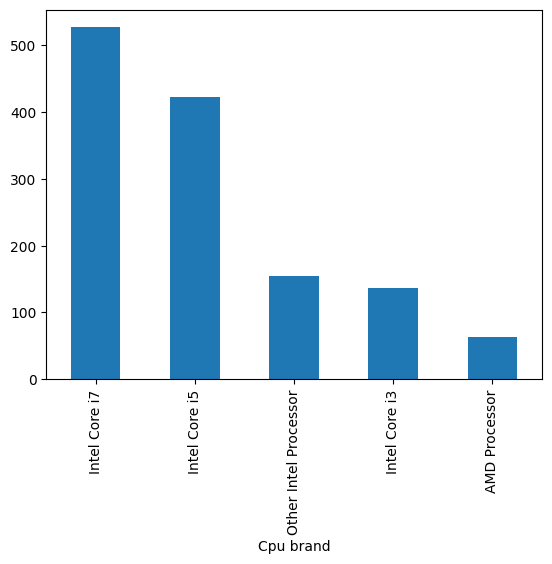

In [50]:
df['Cpu brand'].value_counts().plot(kind='bar')
plt.show()

**Price Comparison by CPU Brand**
- Displays how the price of laptops varies depending on the CPU brand, giving insight into the pricing trends for different processors.


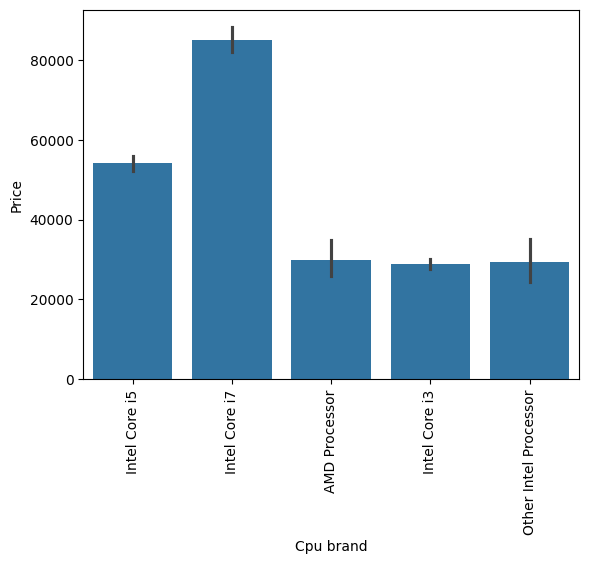

In [51]:

sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Droping Columns Cpu and Cpu Name**
- Streamlines the dataset by keeping only the relevant columns, reducing redundancy and preparing for further analysis

In [52]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

`Removes the original Cpu and Cpu Name columns from the dataset since a more concise and useful Cpu brand column has been created.`


In [53]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


`Displays the first few rows of the dataset to verify that the new column Cpu brand has been added correctly and the unnecessary columns have been removed.`


**1. Plotting the Distribution of RAM (Bar Plot)**
 - visualizing the frequency distribution of different RAM sizes

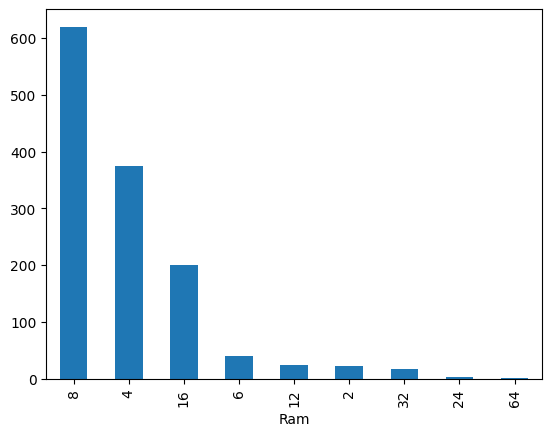

In [54]:
df['Ram'].value_counts().plot(kind='bar')
plt.show()

`visualizes the distribution of RAM sizes in the dataset using a bar plot. It helps you understand which RAM sizes are more common in the laptop dataset, allowing for analysis of trends in laptop RAM.`

**Relationship Between RAM and Laptop Price**

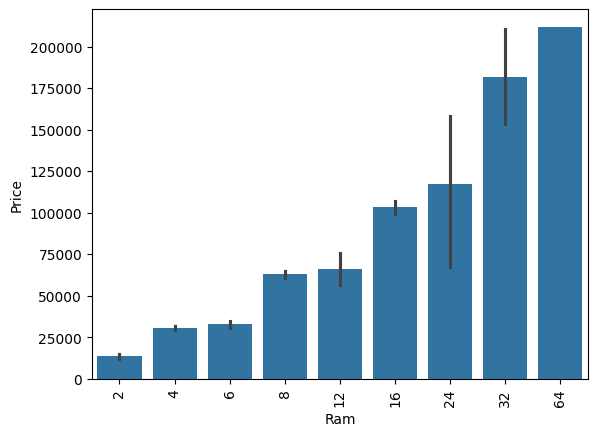

In [55]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

`compare how the price of laptops changes across different RAM sizes, helping to identify if higher RAM generally leads to higher prices.`



**Memory Value Counts**
 - It provides insight into the most common storage configurations in the dataset, such as how many laptops have 256GB SSD, 1TB HDD, or hybrid storage options.



In [56]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


**Convert and Clean the 'Memory' Column**

In [57]:
# Convert 'Memory' column to string and clean up the data
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)  # Remove .0 from values
df["Memory"] = df["Memory"].str.replace('GB', '')  # Remove 'GB'
df["Memory"] = df["Memory"].str.replace('TB', '000')  # Convert 'TB' to '000' (for TB to GB conversion)

# Split 'Memory' column by '+' to separate multiple storage devices (e.g., '512GB SSD + 1TB HDD')
new = df["Memory"].str.split("+", n=1, expand=True)

# Create 'first' and 'second' columns from split results
df["first"] = new[0].str.strip()  # Strip any whitespace
df["second"] = new[1]  # If there's no second part, this will be NaN

# Handle the types of storage in the 'first' column
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only numeric values from 'first' column (remove non-digit characters)
df['first'] = df['first'].str.extract('(\d+)')

# Handle the 'second' column
df["second"].fillna("0", inplace=True)  # Replace NaNs in 'second' with "0" for processing
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only numeric values from 'second' column (remove non-digit characters)
df['second'] = df['second'].str.extract('(\d+)')

# Fill NaNs with '0' after extraction
df["first"].fillna("0", inplace=True)
df["second"].fillna("0", inplace=True)

# Convert 'first' and 'second' to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate the total storage for each type (HDD, SSD, Hybrid, Flash Storage)
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])



In [58]:
# Drop the unnecessary columns now that the calculations are done
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD',
                 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

# The final dataframe should now have the total storage values for HDD, SSD, Hybrid, and Flash Storage

In [59]:
df.sample(5)


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
523,HP,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,1.63,36709.92,0,0,100.454670,Intel Core i3,0,128,0,0
672,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.30,55091.52,1,1,165.632118,Intel Core i5,0,256,0,0
1109,Asus,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.59,71341.92,0,1,141.211998,Intel Core i7,1000,128,0,0
255,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.41,50562.72,0,0,165.632118,Intel Core i5,0,256,0,0
1068,Dell,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,3.21,70809.12,0,0,282.423996,Intel Core i7,1000,256,0,0


**Drop the 'Memory' Column**
 - Memory' column from the DataFrame df since it is no longer needed after the storage calculations.




In [60]:
df.drop(columns=['Memory'],inplace=True)

In [61]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


**Calculate the Correlation of Columns with 'Price'**

In [62]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation of numeric columns
orrelation = numeric_df.corr()['Price']
print(correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


`Notably, Ram has a high positive correlation with Price (0.743), while SSD also shows a significant correlation (0.670)`

**Dropping Low-Correlated Features**

In [63]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)


`Drops the Hybrid and Flash_Storage columns, which have very low correlations with the Price column`



In [64]:
df.head()


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


**Count the Occurrences of Each GPU Type**

In [65]:
df['Gpu'].value_counts()


,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [66]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])


`Created a new column Gpu brand by splitting the Gpu column and extracting the first word (e.g., Intel, AMD, Nvidia).`

In [67]:
df.head()


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


**Count the Occurrences of Each GPU Brand**

In [68]:
df['Gpu brand'].value_counts()


,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


`the counts of laptops for each GPU brand, indicating that Intel is the most common, followed by Nvidia, AMD, and ARM, which has only 1 occurrence.`

**Remove Rows with 'ARM' GPU Brand**

In [69]:
df = df[df['Gpu brand'] != 'ARM']


`This is done to remove outliers or brands with very low representation in the dataset, ensuring that subsequent analyses focus on the more prevalent GPU brands.`

In [70]:
df['Gpu brand'].value_counts()


,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


`After filtering out 'ARM', this line calculates and returns the updated frequency counts of GPU brands in the DataFrame df`

**Visualize GPU Brand vs. Price**

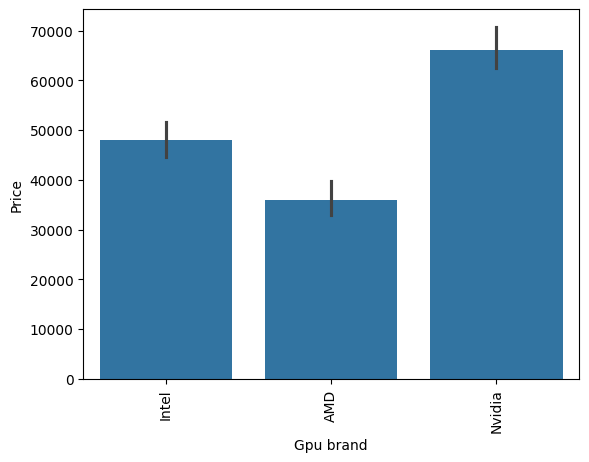

In [71]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

`Laptops with Nvidia GPUs appear to have the highest median price, followed by laptops with Intel GPUs and then AMD GPUs.`

**Drop the GPU Column**


In [72]:
df = df.copy()
df.drop(columns=['Gpu'],inplace=True)

`The code removes the original Gpu column, which is no longer needed after extracting the GPU brand. This step is essential for streamlining the dataset and preventing redundancy.`

In [73]:
df.head()


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


**Count the Operating Systems**

In [74]:
df['OpSys'].value_counts()


,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


**Visualize Operating System vs. Price**

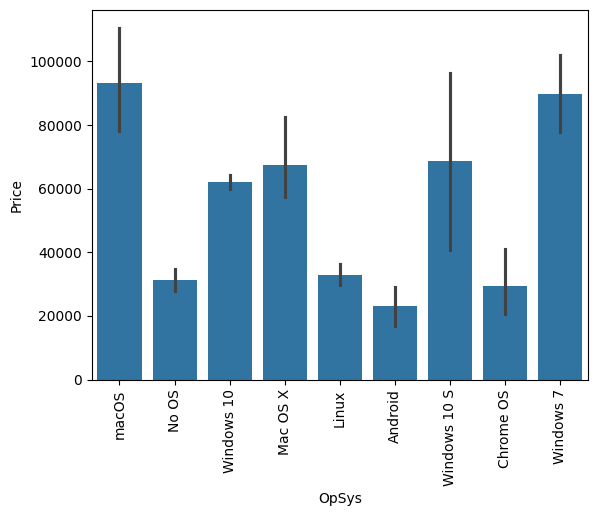

In [75]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Defining a Categorization Function**
 - defines a function cat_os that categorizes operating systems into 'Windows', 'Mac', and 'Others/No OS/Linux'.




In [76]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

 - cat_os function to the 'OpSys' column to create a new column 'os' that contains the categorized  operating system values.




In [77]:
df = df.copy()
df['os'] = df['OpSys'].apply(cat_os)

In [78]:
df.head()


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


**Drop the 'OpSys' Column**

In [79]:
df = df.copy()
df.drop(columns=['OpSys'],inplace=True)


`OpSys' column since it is no longer needed after the operating system categorization has been performed and the new 'os' column has been created.`

**Price Distribution by OS**
 - creates a bar chart to visualize the distribution of laptop prices across different os.




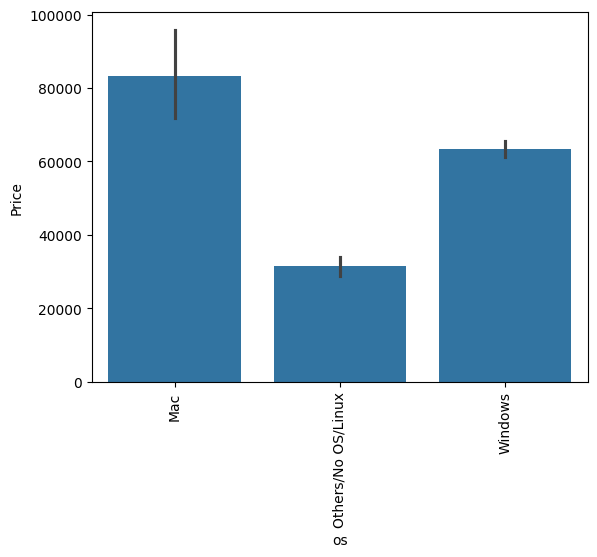

In [80]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Distribution Plot of Laptop Weights with KDE**


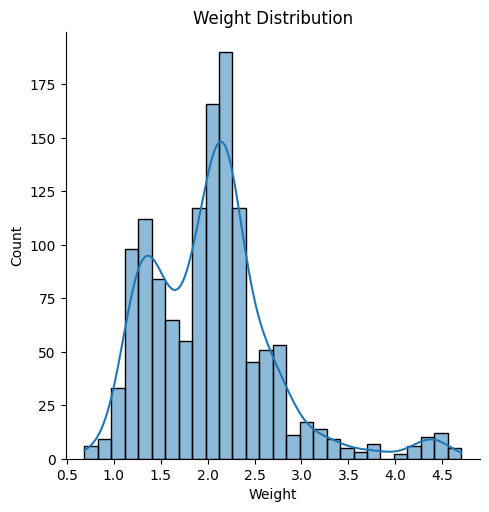

In [81]:
sns.displot(df['Weight'],kde=True)
plt.title('Weight Distribution')
plt.show()

`The displot shows a right-skewed distribution of laptop weights, with most laptops weighing between 1 and 2.5 kg. A KDE curve highlights that around 2 kg is the most common weight.`

**Scatterplot of Laptop Weight vs. Price**

In [82]:
fig = px.scatter(df, x='Weight', y='Price', color='Price',
                 size='Weight', title='Scatterplot of Laptop Weight vs. Price')
fig.show()


`The scatterplot shows that laptop prices slightly increase with weight, but there’s no strong correlation. Most laptops are priced below ₹150,000 regardless of weight.`

**Correlation Analysis Between Laptop Features and Price**

In [83]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()['Price']
print(correlation)

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64


`calculates the correlation of laptop features (such as RAM, weight, storage, etc.) with price. Strong correlations include RAM (0.743) and SSD (0.671), indicating these features significantly impact laptop pricing, while HDD has a weak negative correlation (-0.097).`

**Correlation Heatmap of Laptop Features**

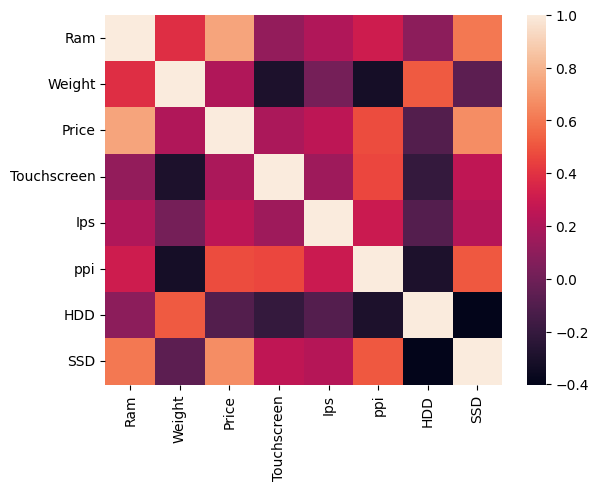

In [84]:
sns.heatmap(numeric_df.corr())
plt.show()

`    The heatmap visualizes correlations between various laptop features and price. Higher positive correlations (lighter colors) are visible between features like RAM, SSD, and price, while negative correlations (darker colors) appear between HDD and price.
`


**Price distribution**

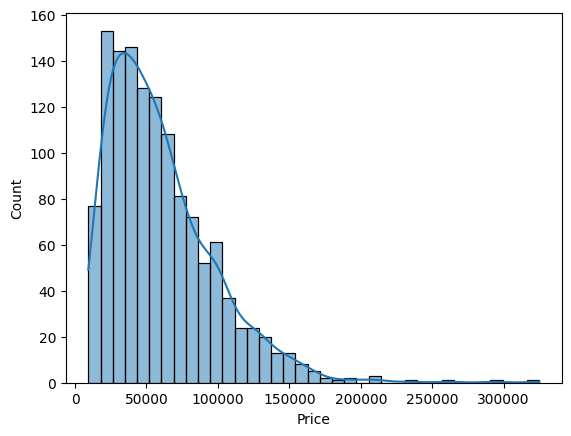

In [85]:
sns.histplot(df['Price'],kde=True)
plt.show()

`This histogram shows the distribution of product prices. The distribution is right-skewed, with most prices concentrated between 0 and about 150,000. There's a long tail extending to higher prices, with few products priced above 200,000. The peak of the distribution occurs around 50,000-75,000.
`

**Log-Transformed Price Distribution**
- Log transformation is often used for price data to handle skewness and make the distribution more symmetric

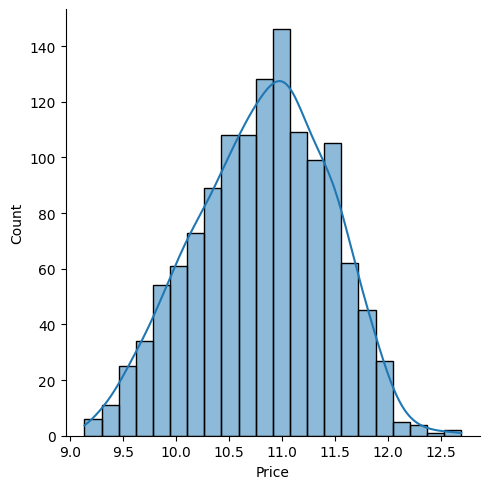

In [86]:
sns.displot(np.log(df['Price']),kde=True)
plt.show()

`This histogram displays the distribution of log-transformed prices. The distribution appears roughly symmetrical and bell-shaped, resembling a normal distribution. The peak occurs around 11.0 on the log scale. The data ranges approximately from 9.0 to 12.5 on the log scale, with the majority of values concentrated between 10.0 and 12.0.`

**Data Preparation**
 -  Separate Features and Log-Transform Target Variable

In [87]:
X = df.drop(columns=['Price'])
#Target Variable
y = np.log(df['Price'])

`prepares the data for modeling by separating the features (X) from the target variable (y). The target variable, Price, is log-transformed to stabilize variance and make the data more suitable for linear regression models. This transformation helps in achieving better model performance and more accurate predictions.`

In [88]:
X #features (X) of the dataset

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [89]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


**Train-Test Split**
 - splits the data into training and testing sets.

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)


`The data is split into training (85%) and testing (15%) sets`

In [91]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


`Display Training Features (X_train)`

# Model Pipeline Setup
 - **sets up a preprocessing and modeling pipeline.**


In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [93]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


# Linear regression


In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11]) #One-hot encoding for categorical variables
],remainder='passthrough')

step2 = LinearRegression()

## Pipeline Creation

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


##Model Training and Evaluation

pipe.fit(X_train,y_train)

##Prediction
y_pred = pipe.predict(X_test)
##Evaluation
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.807327744841864
MAE 0.21017827976428802


`The R2 score of 0.8073 indicates that the model explains about 80.73% of the variance in the log-transformed laptop prices. The Mean Absolute Error of 0.2102 suggests that, on average, the model's predictions deviate from the actual log-transformed prices by about 0.2102 units.`

# K-Nearest Neighbors Regressor (KNN)

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8017673664034364
MAE 0.19346118183798544


`The KNeighborsRegressor provides a moderately good fit, but not the best performance among the tested models.`

# DecisionTreeRegressor Model

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8454326070150531
MAE 0.18034505219278524


`Decision Tree model improves the R2 score compared to KNN and has slightly lower error, performing better in general.
`


# Support Vector Regressor (SVR) Model


In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8083180902272435
MAE 0.20239059427315706


`The SVR model shows a slight improvement in R2 score compared to KNN but has a slightly higher error, indicating that it's not performing as well as the Decision Tree.
`

# RandomForestRegressor Model


In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


` The Random Forest model gives one of the best performances in terms of both R2 score and error reduction, making it a strong candidate for the best model.
`

# ExtraTreesRegressor Model


In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8753793123440623
MAE 0.15979519126758127


`The Extra Trees model performs very well, achieving a high R2 score and a low MAE. It is close in performance to the RandomForestRegressor`

# AdaBoostRegressor Model



In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7935443791117285
MAE 0.23364815353034796


`The AdaBoost model underperforms compared to other models, with a lower R2 score and higher error`


#  Gradient Boost

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8809040460595492
MAE 0.1596049568640976


`The Gradient Boosting model performs similarly to the Random Forest model, achieving a high R2 score and a low MAE, making it one of the best-performing models.`



#  Stacked Model without Hyperparameter Tuning:



In [102]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge  # Meta-model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Define column transformer (same for both models)
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
], remainder='passthrough')

# Define the base models
random_forest = RandomForestRegressor(n_estimators=100,
                                      random_state=3,
                                      max_samples=0.5,
                                      max_features=0.75,
                                      max_depth=15)

gradient_boosting = GradientBoostingRegressor(n_estimators=500)

# Create pipelines for each model
pipe_rf = Pipeline([
    ('step1', step1),
    ('rf', random_forest)
])

pipe_gb = Pipeline([
    ('step1', step1),
    ('gb', gradient_boosting)
])

# Define the meta-model (for stacking, a simple Ridge regression)
meta_model = Ridge()

# Create the StackingRegressor
stacked_model = StackingRegressor(
    estimators=[('rf', pipe_rf), ('gb', pipe_gb)],
    final_estimator=meta_model
)

# Fit the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Make predictions using the stacked model
y_pred = stacked_model.predict(X_test)

# Evaluate the stacked model
print('Stacked R2 score:', r2_score(y_test, y_pred))
print('Stacked MAE:', mean_absolute_error(y_test, y_pred))


Stacked R2 score: 0.8911634367505601
Stacked MAE: 0.15371601871453722


# Stacked Model with Hyperparameter Tuning (RandomizedSearchCV):




In [103]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for RandomForest (adjusting to correct step name in the pipeline 'rf')

rf_params = {
    'rf__rf__n_estimators': [100, 200, 400],
    'rf__rf__max_depth': [10, 20, 30, None],
    'rf__rf__min_samples_split': [2, 5, 10],
    'rf__rf__min_samples_leaf': [1, 2, 4],
    'rf__rf__max_features': ['sqrt', 'log2', 0.8]  # Adjusted this
}


# Define hyperparameter grid for GradientBoosting (adjusting to correct step name in the pipeline 'gb')
gb_params = {
    'gb__gb__n_estimators': [100, 500, 700],
    'gb__gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__gb__max_depth': [3, 5, 7],
    'gb__gb__min_samples_split': [2, 5, 10],
    'gb__gb__min_samples_leaf': [1, 2, 4]
}

# Combine both hyperparameter grids
param_grid = {**rf_params, **gb_params}

# Define the meta-model (for stacking, a simple Ridge regression)
meta_model = Ridge()

# Create the StackingRegressor
stacked_model = StackingRegressor(
    estimators=[('rf', pipe_rf), ('gb', pipe_gb)],
    final_estimator=meta_model
)

# Apply RandomizedSearchCV for the stacked model
random_search = RandomizedSearchCV(estimator=stacked_model, param_distributions=param_grid,
                                   n_iter=100, cv=10, verbose=2, n_jobs=-1, random_state=42)
# Train the stacked model with hyperparameter tuning
try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during model training: {e}")


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


600 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py", line 971, in fit
    return super().fit(X, y, sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.1

In [104]:
# If the training was successful, proceed with evaluation
if hasattr(random_search, 'best_estimator_'):
    # Get best parameters and evaluate the model
    print("Best Parameters from RandomizedSearchCV: ", random_search.best_params_)

    # Use the optimized model for prediction
    y_pred = random_search.best_estimator_.predict(X_test)

    # Evaluate the optimized model
    print('Optimized R2 score:', r2_score(y_test, y_pred))
    print('Optimized MAE:', mean_absolute_error(y_test, y_pred))
else:
    print("Model training failed. Unable to proceed with evaluation.")



Best Parameters from RandomizedSearchCV:  {'rf__rf__n_estimators': 100, 'rf__rf__min_samples_split': 2, 'rf__rf__min_samples_leaf': 1, 'rf__rf__max_features': 'sqrt', 'rf__rf__max_depth': None, 'gb__gb__n_estimators': 100, 'gb__gb__min_samples_split': 5, 'gb__gb__min_samples_leaf': 4, 'gb__gb__max_depth': 5, 'gb__gb__learning_rate': 0.01}
Optimized R2 score: 0.8988623782819539
Optimized MAE: 0.1530076504333267





# Best Model

**Stacked Model with Hyperparameter Tuning:**

 The `stacked` model combines `RandomForestRegressor` and `GradientBoostingRegressor`, with a `Ridge regression` as the `meta-model`. Hyperparameter `tuning` is performed using `RandomizedSearchCV` to `optimize` the `parameters`.

**Performance:** After tuning, the model achieved an Optimized` R2 score` of` 0.898869` and an `Optimized MAE` of` 0.152997`, outperforming individual models and making it the best-performing `model` in the `project`.




In [109]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(random_search.best_estimator_,open('stacked_model.pkl','wb'))